# Proyek Pertama Machine Learning Terapan: 
## Klasifikasi Berita HOAX Indonesia Menggunakan Perbandingan Algoritma Boosting
Oleh: Handhika Yanuar Pratama


## A. Domain Proyek
### I. Latar Belakang

Hoax adalah kabar, informasi, berita palsu atau bohong. Sedangkan dalam KBBI disebut dengan hoaks yang artinya berita bohong [1]. Hoax bertujuan membuat opini publik, menggiring opini, membentuk persepsi, juga untuk bersenang-senang yang menguji kecerdasan dan kecermatan pengguna internet dan media sosial [2]. Hoax dibuat seseorang atau kelompok dengan beragam tujuan, mulai  sekedar main-main, hingga tujuan ekonomi (penipuan), dan politik /pembentukan opini publik) atau agitasi (hasutan). Hoax biasanya muncul ketika sebuah isu mencuat ke permukaan, namun banyak yang belum terungkap atau menjadi tanda tanya. [3]

Klasifiaksi berita hoaks merupakan salah satu aplikasi kategorisasi teks. Berita hoaks harus diklasifikasikan karena berita hoaks dapat mempengaruhi tindakan dan pola pikir pembaca [4]. Penelitian ini akan peneliti akan menggunakan dataset yang diperoleh dari [5]. Dataset tersebut digunakan oleh Pratiwi, et. al (2017) untuk mengklasifikasikan berita hoax dalam bahasa Indonesia menggunakan Naive Bayes Classifier. Pendekatan yang hendak peneliti gunakan yaitu menerapkan algoritma boosting.

### II. Rumusan Masalah
Dalam mendukung penelitian ini, disusunlah rumusan masalah sebagai berikut
1. Bagaimana hasil klasifikasi berita hoax menggunakan algoritma boosting dibandingkan dengan algoritma lainnya?
2. Bagaimana nilai accuracy dan precision score dari model tersebut?


## B. Bussiness Understanding
### I. Problem Statements
Banyaknya berita hoax yang beredar di Indonesia dapat memicu keresahan di masyarakat. Berita palsu ini dapat menggiring opini yang dapat memecah belah masyarakat sehingga penelitian ini hendak mengusulkan penerapan algoritma boosting untuk klasifikasi HOAX.
### II. Goals
Tujuan dari penelitian ini yaitu menguji algoritma boosting untuk melakukan klasifiaksi HOAX kemudian mengujinya dengan algoritma lain untuk memperoleh algoritma terbaik yang dapat digunakan sebagai model klasifikasi hoax.
### III. Solutions
Dengan terciptanya model terbaik untuk klasifikasi HOAX, diharapkan dapat dimanfaatkan untuk proses klasifikasi HOAX oleh pihak yang berwenang. Supaya, jumlah berita HOAX yang beredar di masyarakat dapat berkurang atau dihilangkan.


## C. Data Understanding
### I. Dataset
Dataset yang digunakan pada penelitian ini bersumber dari dataset yang dibuat pada penelitian yang dilakukan oleh Pratiwi, et.al (2017) yang dapat diakses secara terbuka pada tautan [berikut](https://easy.dans.knaw.nl/ui/datasets/id/easy-dataset:112259/tab/2) 
### II. Fitur Dataset
Bersumber dari paper aslinya, dataset ini terdiri dari lima buah file:
1. 250 news with valid hoax label.csv
2. 250 news labelling process.xlsx
3. 250 news experiment documentation.xlsx
4. 600 news with valid hoax label.csv
5. 600 news labelling process.xlsx

Dari lima buah file tersebut akan digunakan file nomor 4 yang berisikan 600 berita dalam bahasa Indonesia yang telah diklasifikasikan dengan label hoax/valid.


### I. Import Modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### II. Import Dataset

In [2]:
df = pd.read_csv('600 news with valid hoax label.csv', delimiter=';', encoding='cp1252')

In [3]:
df.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [4]:
df.shape

(600, 2)

In [5]:
df.isnull().sum()

berita     0
tagging    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


Berdasarkan output tersebut, dapat terlihat bahwa data terdiri dari 2 buah kolom dengan jumlah 600 baris yang mana tidak ada nilai null pada data tersebut serta tidak ada nilai yang bersifat duplikat pada dataset ini

## D. Data Preparation

### I. Visualisasi Dataset

Setelah mengetahui karakteristik data, maka dilakukan visualisasi data untuk mengetahui persebaran data

In [8]:
df.tagging.value_counts()

Valid    372
Hoax     228
Name: tagging, dtype: int64

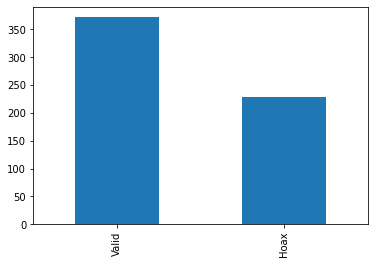

In [9]:
df.tagging.value_counts().plot(kind='bar')

Dapat terlihat dari visualisasi tersebut data terdiri dalam dua kategori valid dan hoax:
1. Jumlah data Valid yaitu 372 berita
2. Jumlah data Hoax yaitu 228 berita

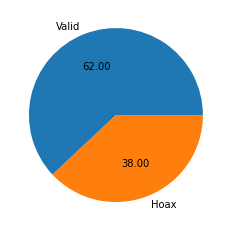

In [10]:
plt.pie(df['tagging'].value_counts(), labels=['Valid', 'Hoax'], autopct="%0.2f")
plt.show()

Terlihat bahwa 62% data bersifat valid sedangkan 38% bersifat hoax. Dari hal ini dapat terlihat bahwa persebaran data kurang begitu seimbang

### II. Label Encoding
Melakukan label encoding pada kolom tagging untuk memudahkan pemrosesan data

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['tagging'] = encoder.fit_transform(df['tagging'])

In [13]:
df.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",1
1,Isu bahwa ikan lele mengandung sel kanker di j...,1
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,1
3,Ikan lele merupakan salah satu makanan favorit...,1
4,Ikan lele merupakan bahan makanan yang cukup p...,1


Setelah dibuat label encoding dapat diketahui bahwa:
1. Nilai 1 berarti berita Valid
2. Nilai 0 berarti berita Hoax

### III. Exploratory Data Analysis 
Melakukan label encoding pada kolom tagging untuk memudahkan pemrosesan data

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Membuat kolom banyak karakter, banyak kata, dan banyak kalimat pada dataset
df['banyak_karakter'] = df['berita'].apply(len)
df['banyak_kata'] = df['berita'].apply(lambda x:len(nltk.word_tokenize(x)))
df['banyak_kalimat'] = df['berita'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df

,berita,tagging,banyak_karakter,banyak_kata,banyak_kalimat
0,"Jakarta, Di jejaring sosial, banyak beredar in...",1,1999,344,18
1,Isu bahwa ikan lele mengandung sel kanker di j...,1,2859,477,22
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,1,1722,271,9
3,Ikan lele merupakan salah satu makanan favorit...,1,5418,832,51
4,Ikan lele merupakan bahan makanan yang cukup p...,1,3829,622,32
...,...,...,...,...,...
595,Kabar yang beredar seputar rencana kenaikan ga...,1,1177,168,1
596,Kabar yang beredar seputar rencana kenaikan ga...,1,1232,181,1
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",1,1353,205,1
598,Rancangan peraturan pemerintah (RPP) tentang G...,1,1329,207,1


In [17]:
df[['banyak_karakter', 'banyak_kata', 'banyak_kalimat']].describe()

,banyak_karakter,banyak_kata,banyak_kalimat
count,600.0000,600.000000,600.000000
mean,2213.0550,356.748333,17.638333
std,1204.0733,193.914706,11.875152
min,543.0000,94.000000,1.000000
25%,1350.0000,220.750000,11.000000
50%,1940.5000,312.000000,15.000000
75%,2778.5000,443.250000,22.000000
max,9618.0000,1445.000000,84.000000


In [18]:
# Memetakan informasi dari berita valid
df[df.tagging == 1][['banyak_karakter', 'banyak_kata', 'banyak_kalimat']].describe()

,banyak_karakter,banyak_kata,banyak_kalimat
count,372.000000,372.000000,372.000000
mean,2120.177419,341.518817,17.024194
std,1120.484945,179.446685,11.237306
min,543.000000,94.000000,1.000000
25%,1329.750000,218.500000,10.750000
50%,1879.500000,302.500000,15.000000
75%,2535.000000,406.500000,21.000000
max,9618.000000,1445.000000,77.000000


In [19]:
# Memetakan informasi dari berita hoax
df[df.tagging == 0][['banyak_karakter', 'banyak_kata', 'banyak_kalimat']].describe()

,banyak_karakter,banyak_kata,banyak_kalimat
count,228.000000,228.000000,228.000000
mean,2364.592105,381.596491,18.640351
std,1317.780103,213.534106,12.810463
min,668.000000,109.000000,1.000000
25%,1392.000000,222.750000,11.000000
50%,2094.500000,335.500000,16.000000
75%,2967.250000,466.000000,23.000000
max,8573.000000,1399.000000,84.000000


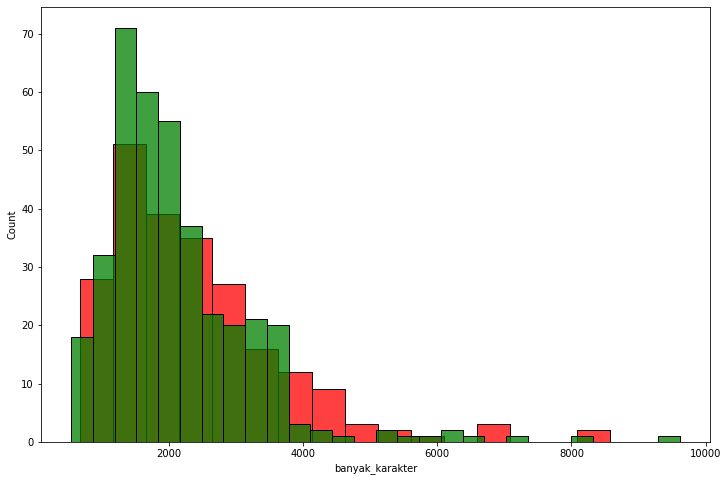

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['tagging'] == 0]['banyak_karakter'], color='red')
sns.histplot(df[df['tagging'] == 1]['banyak_karakter'], color='green')

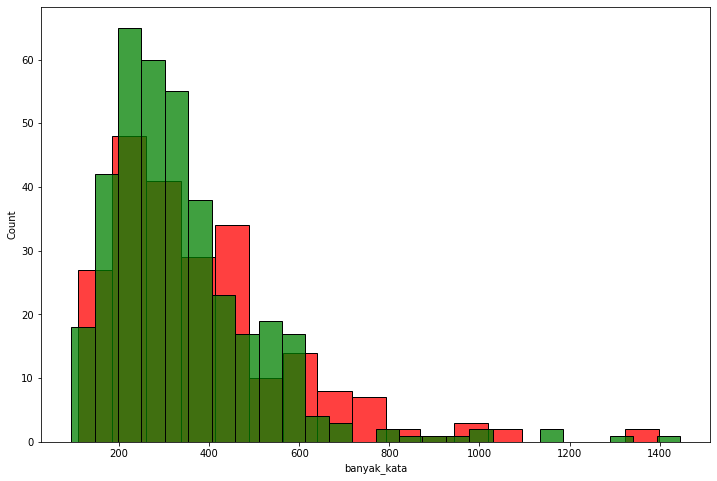

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['tagging'] == 0]['banyak_kata'], color='red')
sns.histplot(df[df['tagging'] == 1]['banyak_kata'], color='green')

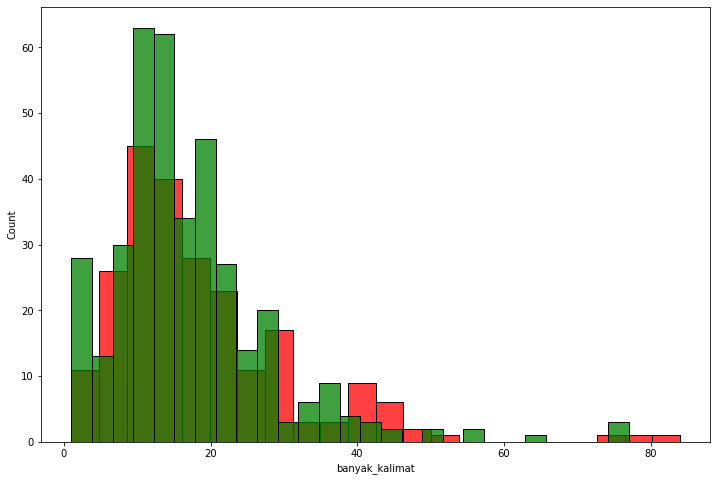

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['tagging'] == 0]['banyak_kalimat'], color='red')
sns.histplot(df[df['tagging'] == 1]['banyak_kalimat'], color='green')

Ketiga gambar plot tersebut merupakan hasil plotting dari dataset berita. Dari ketiga output dapat terlihat bahwa persebaran data cukup merata. 

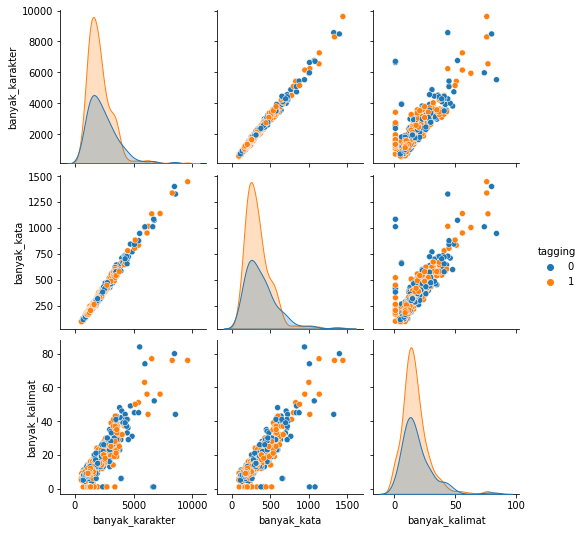

In [23]:
sns.pairplot(df, hue='tagging')

Menggunakan grafik pairplot persebaran data merata berdasarkan klasifikasi hoax maupun valid

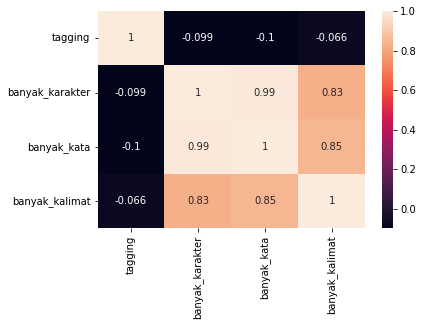

In [24]:
sns.heatmap(df.corr(), annot=True)

Dari gambar di atas, bahwa banyak karakter memiliki korelasi dengan banyak kata

### IV. Data Processing

Pada tahap ini saya hendak melakukan pemrosesan pada data sebelum dilakukan pembuatan model, tahapan yang saya lalui meliputi:
1. Lower Case
2. Tokenization
3. Removing Special Character
4. Removing Stop Words and Punctuation
5. Stemming

Stopwords dan Stemmer yang disediakan oleh nltk secara umum menggunakan bahasa Inggris. Pada pengerjaan ini karena yang digunakan adalah dataset berbahasa Indonesia, maka digunakan kombinasi antara nltk dan sebuah corpus bernama sastrawi yang merupakan corpus berbahasa Indonesia. [Link](https://pypi.org/project/Sastrawi/)

In [25]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 4.2 MB/s 


In [26]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('indonesian')

import string
string.punctuation

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
def transform_berita(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('indonesian') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(stemmer.stem(i))

  return " ".join(y)

In [33]:
# Menguji salah satu contoh berita untuk menjalankan fungsi transform berita
df['berita'][0]

'Jakarta, Di jejaring sosial, banyak beredar informasi yang menyebut lele sebagai\nikan paling jorok. Dalam sesuap daging ikan lele, terkandung 3000 sel kanker. Benarkah?\nJulukan sebagai ikan paling jorok merujuk pada sifat lele yang doyan mengonsumsi\nsegala jenis limbah di perairan. Bahkan sebuah artikel yang cukup viral di internet\nmenyebutkan kotoran manusia juga dijadikan pakan pada sebuah budidaya lele di Kota Haikou, China.\nSementara itu di habitat aslinya, lele atau catfish juga dikenal sebagai spesies ikan yang\nsangat tangguh. Ikan ini dilengkapi alat pernapasan tambahan berupa labirin,\nsehingga mampu bertahan hidup dalam kondisi perairan berlumpur atau bahkan tercemar.\nAgaknya, fakta inilah yang memunculkan dugaan soal akumulasi racun karsinogen (penyebab kanker) di tubuh ikan lele.\nUntungnya, ikan lele yang beredar di pasaran bukan berasal dari alam liar.\nLele banyak dibudidayakan di kolam-kolam, yang mestinya bisa dikendalikan agar bebas dari pencemaran.\nPakan yang

In [34]:
transform_berita(df['berita'][0])

'jakarta jejaring sosial edar informasi sebut lele ikan jorok suap daging ikan lele kandung 3000 sel kanker juluk ikan jorok rujuk sifat lele doyan konsumsi jenis limbah air artikel viral internet kotor manusia jadi pakan budidaya lele kota haikou china habitat asli lele catfish kenal spesies ikan tangguh ikan lengkap alat napas tambah labirin tahan hidup kondisi air lumpur cemar fakta muncul duga akumulasi racun karsinogen sebab kanker tubuh ikan lele untung ikan lele edar pasar asal alam liar lele dibudidayakan mesti kendali bebas cemar pakan pilih andal limbah popularitas ikan sungut pudar tingkat data menteri laut ikan kkp sebut produksi lele 2013 capai ton tingkat ton 2012 ton konsumsi ikan lele badan pusat statistik bps catat kg kapita kg kapita jakarta 6000 lapak pecel lele daftar asosiasi dagang kaki indonesia apkli kandung nutrisi dipungkiri lele sumber protein harga murah riah fakta ikan lele rendah kolesterol tenggelam tuding lele picu kanker teliti makan lele picu kanker dr

In [35]:
df['transform_berita'] = df['berita'].apply(transform_berita)

In [36]:
df.head()

,berita,tagging,banyak_karakter,banyak_kata,banyak_kalimat,transform_berita
0,"Jakarta, Di jejaring sosial, banyak beredar in...",1,1999,344,18,jakarta jejaring sosial edar informasi sebut l...
1,Isu bahwa ikan lele mengandung sel kanker di j...,1,2859,477,22,isu ikan lele kandung sel kanker jejaring soci...
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,1,1722,271,9,nikmat kuliner bahan dasar ikan lele berita su...
3,Ikan lele merupakan salah satu makanan favorit...,1,5418,832,51,ikan lele salah makan favorit indonesia harga ...
4,Ikan lele merupakan bahan makanan yang cukup p...,1,3829,622,32,ikan lele bahan makan populer indonesia sebar ...


### V. Visualisasi menggunakan WordCloud

Tahapan visualisasi menggunakan WordCloud ini yaitu supaya dapat mengetahui lebih spesifik kata yang sering muncul pada sebuah berita yang telah diproses untuk berita valid dan hoax

In [37]:
from wordcloud import WordCloud
wcloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
hoax_wcloud = wcloud.generate(df[df['tagging'] == 0]['transform_berita'].str.cat(sep=' '))

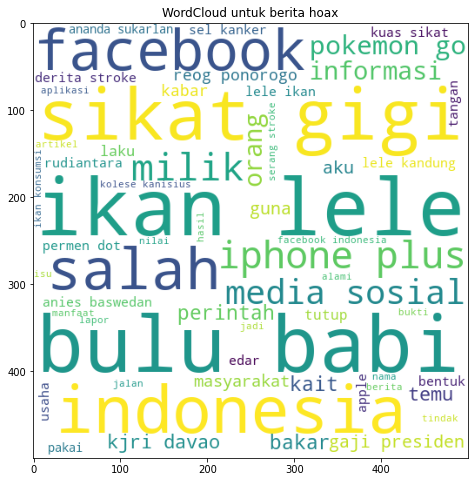

In [45]:
plt.figure(figsize=(12,8))
plt.title("WordCloud untuk berita hoax")
plt.imshow(hoax_wcloud)

In [46]:
valid_wcloud = wcloud.generate(df[df['tagging'] == 1]['transform_berita'].str.cat(sep=' '))

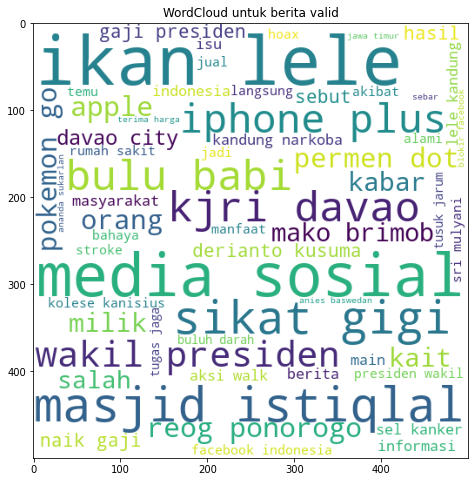

In [47]:
plt.figure(figsize=(12,8))
plt.title("WordCloud untuk berita valid")
plt.imshow(valid_wcloud)

### VI. Memetakan kata yang sering muncul pada tiap jenis berita

Setelah melihat persebaran kata menggunakan teknik WordCloud, teknik tersebut tidak dapat menampilkan secara jelas jumlah kata yang muncul, pada tahap ini bertujuan untuk memetakan kata yang sering muncul pada berita valid maupun hoax 

#### A. Berita Hoax 

In [48]:
hoax_corpus = []
for berita in df[df['tagging'] == 0]['transform_berita'].tolist():
  for kata in berita.split():
    hoax_corpus.append(kata)

In [49]:
len(hoax_corpus)

41649

In [50]:
from collections import Counter
Counter(hoax_corpus).most_common(15)

[('lele', 482),
 ('ikan', 473),
 ('babi', 334),
 ('bulu', 329),
 ('indonesia', 298),
 ('sikat', 297),
 ('facebook', 281),
 ('kandung', 260),
 ('pokemon', 253),
 ('bakar', 240),
 ('stroke', 231),
 ('iphone', 216),
 ('gigi', 215),
 ('kuas', 211),
 ('gaji', 207)]

In [51]:
pd.DataFrame(Counter(hoax_corpus).most_common(15))

,0,1
0,lele,482
1,ikan,473
2,babi,334
3,bulu,329
4,indonesia,298
5,sikat,297
6,facebook,281
7,kandung,260
8,pokemon,253
9,bakar,240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


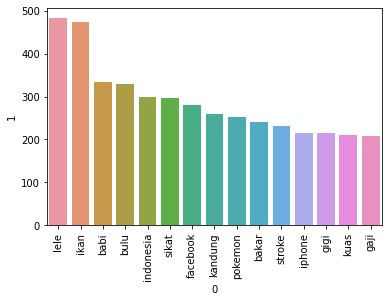

In [53]:
sns.barplot(pd.DataFrame(Counter(hoax_corpus).most_common(15))[0], pd.DataFrame(Counter(hoax_corpus).most_common(15))[1])
plt.xticks(rotation='vertical')
plt.show()

#### B. Berita Valid

In [54]:
valid_corpus = []
for berita in df[df['tagging'] == 1]['transform_berita'].tolist():
  for kata in berita.split():
    valid_corpus.append(kata)

In [55]:
len(valid_corpus)

60986

In [56]:
from collections import Counter
Counter(valid_corpus).most_common(15)

[('lele', 598),
 ('ikan', 492),
 ('pokemon', 385),
 ('edar', 377),
 ('masjid', 361),
 ('media', 352),
 ('indonesia', 347),
 ('facebook', 340),
 ('presiden', 337),
 ('tahan', 322),
 ('bulu', 303),
 ('sosial', 296),
 ('sikat', 296),
 ('kandung', 291),
 ('iphone', 291)]

In [57]:
pd.DataFrame(Counter(valid_corpus).most_common(15))

,0,1
0,lele,598
1,ikan,492
2,pokemon,385
3,edar,377
4,masjid,361
5,media,352
6,indonesia,347
7,facebook,340
8,presiden,337
9,tahan,322


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


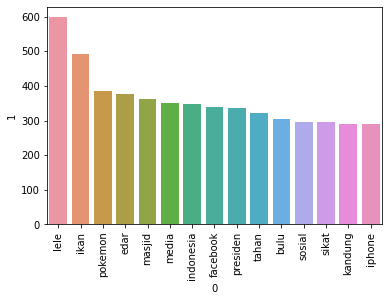

In [59]:
sns.barplot(pd.DataFrame(Counter(valid_corpus).most_common(15))[0], pd.DataFrame(Counter(valid_corpus).most_common(15))[1])
plt.xticks(rotation='vertical')
plt.show()

Dari perbandingan dua dataset tersebut, ternyata kata lele merupakan kata yang sering muncul di kedua berita. Selain itu, kata yang sering muncul juga terlihat mirip, hal ini menandakan bahwa berita HOAX memang dibuat sedemikian rupa seolah-olah sama dengan berita asli

## E. Model Building

#### I. Feature Engineering

Pada tahap ini merupakan tahapan pembuatan model, sebelum membuat model akan dilakukan proses Feature Engineering memanfaatkan TfidfVectorizer

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=300)

In [69]:
X = tfidf.fit_transform(df['transform_berita']).toarray()

In [70]:
X.shape

(600, 300)

In [71]:
y = df['tagging'].values

In [72]:
y

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

#### II. Split Data
Sebelum data ditraining maka akan dilakukan proses split data. Karena jumlah data yang terbatas hanya 600 saja, maka akan digunakan perbandingan train:test sebesar 85:15 saja

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=21)

#### III. Modelling

Seperti yang telah disebutkan, peroses pembuatan model klasifikasi ini akan memanfaatkan perbandingan algoritma boosting. Pada tahap ini akan digunakan tiga buah algoritma antara lain:
1. AdaBoost
2. GradientBoost
3. XGBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
adb = AdaBoostClassifier(n_estimators=50, random_state=21)
gdb = GradientBoostingClassifier(n_estimators=50, random_state=21)
xgb = XGBClassifier(n_estimators=50, random_state=21)

In [79]:
algorithm = {
    'AdaBoost' : adb,
    'GradientBoost' : gdb,
    'XGBoost' : xgb
}

#### IV. Evaluation

Tahap ini sebenarnya pada notebook ini saling berkesinambungan dengan bagian sebelumnya, tujuannya supaya untuk mengetahui hasil akurasi dari model. Tiga buah metriks yang digunakan yaitu
1. Accuracy score: Tingkat kedekatan antara nilai prediksi dengan nilai aktual
2. Confusion matrix:  Tabel yang menampilkan proses klasifikasi ke dalam empat bagian True Positve, True Negative, False Positive, dan False Negative
3. Precision score: Tingkat ketepatan antara informasi yang asli dengan informasi yang diberikan oleh mesin

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [93]:
def train_algorithm(algorithm, X_train, y_train, X_test, y_test):
  algorithm.fit(X_train, y_train)
  y_pred = algorithm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, matrix, precision

In [ ]:
print("Accuracy score:\n", accuracy_score(y_test, y_pred_bnb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Precision score:\n", precision_score(y_test, y_pred_bnb))

In [94]:
print(train_algorithm(adb, X_train, y_train, X_test, y_test))

(0.6888888888888889, array([[26, 15],
       [13, 36]]), 0.7058823529411765)


In [98]:
accuracy_scores = []
confusion_matrixs = []
precision_scores = []

for name, algo in algorithm.items():
  current_acc, current_mat, current_prec = train_algorithm(algo, X_train, y_train, X_test, y_test)

  print("\a")
  print(f"[{name}]")
  print("Accuracy: ", current_acc)
  print("Confusion Matrix: \n", current_mat)
  print("Precision: ", current_prec)

  accuracy_scores.append(current_acc)
  precision_scores.append(current_prec)


[AdaBoost]
Accuracy:  0.6888888888888889
Confusion Matrix: 
 [[26 15]
 [13 36]]
Precision:  0.7058823529411765

[GradientBoost]
Accuracy:  0.7222222222222222
Confusion Matrix: 
 [[24 17]
 [ 8 41]]
Precision:  0.7068965517241379

[XGBoost]
Accuracy:  0.7
Confusion Matrix: 
 [[23 18]
 [ 9 40]]
Precision:  0.6896551724137931


In [99]:
boosting_df = pd.DataFrame({'Algorithm': algorithm.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values(['Precision', 'Accuracy'], ascending=False)

In [100]:
boosting_df

,Algorithm,Accuracy,Precision
1,GradientBoost,0.722222,0.706897
0,AdaBoost,0.688889,0.705882
2,XGBoost,0.700000,0.689655


In [102]:
boosting_df1 = pd.melt(boosting_df, id_vars='Algorithm')

In [103]:
boosting_df1

,Algorithm,variable,value
0,GradientBoost,Accuracy,0.722222
1,AdaBoost,Accuracy,0.688889
2,XGBoost,Accuracy,0.700000
3,GradientBoost,Precision,0.706897
4,AdaBoost,Precision,0.705882
5,XGBoost,Precision,0.689655


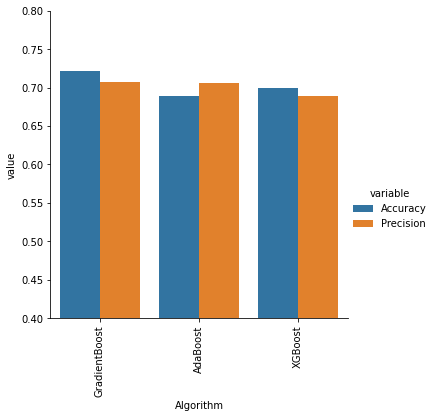

In [108]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=boosting_df1, kind='bar')
plt.ylim(0.4, 0.8)
plt.xticks(rotation='vertical')
plt.show()

Dapat terlihat bahwa nilai model akurasi dari ketiga algoritma boosting menunjukkan nilai yang kurang memuaskan. Akurasi tertinggi diperoleh menggunakan **GradientBoosting**  dengan nilai akurasi 0.72 dan nilai presisi 0.70 saja.

## F. Model Evaluation
Dengan melihat hasil dari model yang dibangun menggunakan GradientBoosting didapati nilai yang kurang memuaskan, pada tahap ini peneliti hendak mengujikan beragam model lainnya pada data tersebut untuk menguji apakah permasalahan kenapa nilai akurasi disebabkan oleh algoritma saja ataupun memang karena data yang diperoleh terlalu sedikit. 

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [110]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [111]:
clfs = {
    'SVC' : svc,
    'KNN' : knn, 
    'NB' : mnb, 
    'DT' : dtc, 
    'LR' : lrc, 
    'RF' : rfc, 
    'AdaBoost' : adb, 
    'BgC' : bc, 
    'ETC' : etc,
    'GBDT' : gdb,
    'xgb' : xgb
}

In [114]:
accuracy_scores = []
confusion_matrixs = []
precision_scores = []

for name, algo in clfs.items():
  current_acc, current_mat, current_prec = train_algorithm(algo, X_train, y_train, X_test, y_test)

  print("\a")
  print(f"[{name}]")
  print("Accuracy: ", current_acc)
  print("Confusion Matrix: \n", current_mat)
  print("Precision: ", current_prec)

  accuracy_scores.append(current_acc)
  precision_scores.append(current_prec)


[SVC]
Accuracy:  0.6222222222222222
Confusion Matrix: 
 [[ 8 33]
 [ 1 48]]
Precision:  0.5925925925925926

[KNN]
Accuracy:  0.6444444444444445
Confusion Matrix: 
 [[21 20]
 [12 37]]
Precision:  0.6491228070175439

[NB]
Accuracy:  0.6444444444444445
Confusion Matrix: 
 [[15 26]
 [ 6 43]]
Precision:  0.6231884057971014

[DT]
Accuracy:  0.6444444444444445
Confusion Matrix: 
 [[11 30]
 [ 2 47]]
Precision:  0.6103896103896104

[LR]
Accuracy:  0.6333333333333333
Confusion Matrix: 
 [[10 31]
 [ 2 47]]
Precision:  0.6025641025641025

[RF]
Accuracy:  0.7444444444444445
Confusion Matrix: 
 [[29 12]
 [11 38]]
Precision:  0.76

[AdaBoost]
Accuracy:  0.6888888888888889
Confusion Matrix: 
 [[26 15]
 [13 36]]
Precision:  0.7058823529411765

[BgC]
Accuracy:  0.7666666666666667
Confusion Matrix: 
 [[30 11]
 [10 39]]
Precision:  0.78

[ETC]
Accuracy:  0.7555555555555555
Confusion Matrix: 
 [[30 11]
 [11 38]]
Precision:  0.7755102040816326

[GBDT]
Accuracy:  0.7222222222222222
Confusion Matrix

In [115]:
algorithm_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values(['Precision', 'Accuracy'], ascending=False)

In [117]:
algorithm_df

,Algorithm,Accuracy,Precision
7,BgC,0.766667,0.780000
8,ETC,0.755556,0.775510
5,RF,0.744444,0.760000
9,GBDT,0.722222,0.706897
6,AdaBoost,0.688889,0.705882
10,xgb,0.700000,0.689655
1,KNN,0.644444,0.649123
2,NB,0.644444,0.623188
3,DT,0.644444,0.610390
4,LR,0.633333,0.602564


In [118]:
algo_comparison = pd.melt(algorithm_df, id_vars='Algorithm')

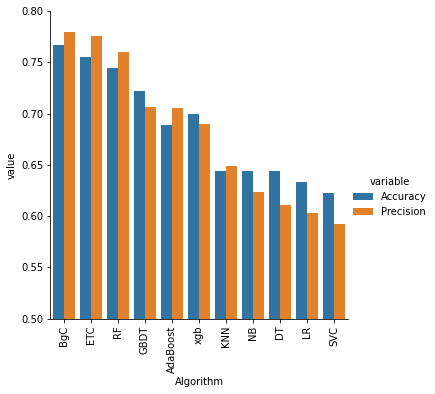

In [120]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=algo_comparison, kind='bar')
plt.ylim(0.5, 0.8)
plt.xticks(rotation='vertical')
plt.show()

Berdasarkan grafik di atas dapat terlihat bahwa persebaran akurasi model berada di rentang 0.5 hingga 0.8. Dimana tiga algoritma puntuk memperoleh akurasi terbaik yaitu

1. BaggingClassifier (0.76, 0.78)
2. ExtraTreesClassifier (0.75, 0.77)
3. RandomForest (0.74, 0.76)

Khusus untuk algoritma boosting yang diajukan, ketiganya menduduki posisis 4, 5, dan 6

### I. Model Save
Model yang paling baik untuk klasifikasi berdasarkan penelitian ini yaitu Bagging Classifier untuk itu akan dimanfaatkan model tersebut untuk dijadikan model sebelum didistribusikan

In [138]:
import pickle

In [139]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=2, verbose=0,
                  warm_start=False)

In [140]:
pickle.dump(tfidf, open('hoax_vectorizer.pkl', 'wb'))
pickle.dump(bc, open('hoax_model.pkl', 'wb'))

### II. Kesimpulan
Dari dataset yang diperoleh peneliti mendapati bahwa penggunaan algoritma boosting bukan merupakan solusi terbaik untuk melakukan klasifikasi berita valid dan hoax. Dari penelitian ini didapati bahwa Bagging Classifier memiliki nilai akurasi tertinggi dibandingkan algoritma lain. Faktor penyebab yang menjadikan rendahnya klasifikasi ini selain dari jumlah data yang kecil juga pada kemiripian kata yang muncul baik pada data berita valid maupun data hoax.

### III. Saran Pengembangan
Dari penelitian ini, peneliti menyadari masih banyak kekurangan yang dapat ditingkatkan:
1. Melakukan *parameter tuning* di setiap algoritma *machine learning*
2. Meningkatkan jumlah dataset yang hendak diuji
3. Melakukan perubahan pada jumlah data latih dan data uji
4. Menerapkan teknik LSTM sebagai algoritma *machine learning* karena banyak yang menyebutkan algoritma ini berhasil meningkatkan nilai akurasi model